In [37]:
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
datasets = pd.read_csv(r'D:\10901資料探勘\作業三\mushroom\agaricus-lepiota.csv')

In [38]:
(datasets.astype(str) == ' ?').any(1)
datasets = datasets[~(datasets.astype(str) == ' ?').any(1)]
lack = datasets.isnull()

In [39]:
datasets.columns = ['edible-or-poisonous','cap-shape','cap-surface','cap-color','bruises','odor',
                   'gill-attachment','gill-spacing','gill-size','gill-color',
                   'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                   'stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring',
                   'veil-type','veil-color','ring-number','ring-type','spore-print-color',
                   'population','habitat']

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in datasets.columns:
    datasets[col]=labelencoder.fit_transform(datasets[col])

In [41]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
import time
from scipy.cluster import hierarchy

In [42]:
HHSTticks = time.process_time()
ml = AgglomerativeClustering(n_clusters=20,affinity='euclidean',linkage='ward')

In [43]:
ml = ml.fit(datasets)
labels = ml.fit_predict(datasets)

In [44]:
cluster_labelss = ml.labels_

In [45]:
silhouette_avgs = metrics.silhouette_score(datasets,cluster_labelss)
print('階層式績效為',silhouette_avgs)

階層式績效為 0.24928267082084843


In [46]:
HHEDticks = time.process_time()
print('階層式所花費的時間為',HHEDticks-HHSTticks)

階層式所花費的時間為 6.671875


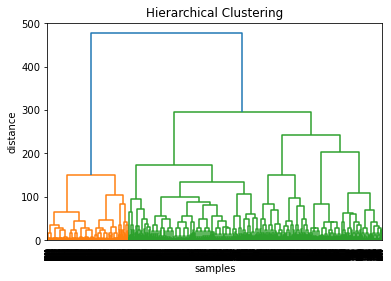

In [47]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(datasets,method = 'ward')
dendrogram = sch.dendrogram(Z)

plt.title('Hierarchical Clustering')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

In [48]:
def purity(X, cluster_labels):
    cluster = np.array(X)
    label = np. array(cluster_labels)
    indedata1 = {}
    for p in np.unique(label):
        indedata1[p] = np.argwhere(label == p)
    indedata2 = {}
    for q in np.unique(cluster):
        indedata2[q] = np.argwhere(cluster == q)

    count_all = []
    for i in indedata1.values():
        count = []
        for j in indedata2.values():
            a = np.intersect1d(i, j).shape[0]
            count.append(a)
        count_all.append(count)

    return sum(np.max(count_all, axis=0))/len(cluster)

In [49]:
purity(cluster_labelss,labels)

1.0